In [450]:
import matplotlib.pyplot as plt
import numpy as np
import MIME_correction

In [451]:
def get_pool_data(first_round_targets : str, second_round_targets : str):
    path = "/datadisk/MIME/discrete_L7_q5_n500k_asstest/"
    ground_truth = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/ground_truth.csv", delimiter=",")
    round_1 = np.log(np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/effects.csv", delimiter=","))
    round_2 = np.log(np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/effects.csv", delimiter=","))

    path_unbound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/non_selected/pairwise_count.csv"
    path_unbound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/non_selected/pairwise_count.csv"
    path_bound_pairwise_counts_r1 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/selected/pairwise_count.csv"
    path_bound_pairwise_counts_r2 = path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/selected/pairwise_count.csv"

    frequency_matrix_r1 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r1, path_bound_pairwise_counts_r1, count_minimum=0)
    frequency_matrix_r2 = MIME_correction.construct_frequency_matrix(path_unbound_pairwise_counts_r2, path_bound_pairwise_counts_r2, count_minimum=0)

    corrected_round_1 = np.linalg.solve(frequency_matrix_r1, round_1)
    corrected_round_2 = np.linalg.solve(frequency_matrix_r2, round_2)

    true_background_r1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/assumptions/true_background.csv", delimiter=",")
    true_background_r2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/assumptions/true_background.csv", delimiter=",")
    average_background_r1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/assumptions/average_background.csv", delimiter=",")
    average_background_r2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/assumptions/average_background.csv", delimiter=",")
    #remove first row and flatten
    true_background_r1 = np.log(true_background_r1[1:].flatten())
    true_background_r2 = np.log(true_background_r2[1:].flatten())
    average_background_r1 = np.log(average_background_r1[1:].flatten())
    average_background_r2 = np.log(average_background_r2[1:].flatten())
    background_difference_r1 = average_background_r1 - true_background_r1
    background_difference_r2 = average_background_r2 - true_background_r2

    gmean_effects_r1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/assumptions/gmean_effects.csv", delimiter=",")
    gmean_effects_r2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/assumptions/gmean_effects.csv", delimiter=",")

    independence_r1 = np.log(gmean_effects_r1[1]) - np.log(gmean_effects_r1[0])
    independence_r2 = np.log(gmean_effects_r2[1]) - np.log(gmean_effects_r2[0])

    sequence_effects_r1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/sequence_effects.csv", delimiter=",")
    sequence_effects_r2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/sequence_effects.csv", delimiter=",")#TODO here only one sequence effect file is stored but for discrete simulations this works differently
    sequence_counts_r1 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_1/counts.csv", delimiter=",")
    sequence_counts_r2 = np.loadtxt(path + f"target1_{first_round_targets}_target2_{second_round_targets}/round_2/counts.csv", delimiter=",")

    return ground_truth, np.exp(round_1), np.exp(round_2), np.exp(corrected_round_1), np.exp(corrected_round_2), background_difference_r1, background_difference_r2, independence_r1, independence_r2, np.log(sequence_effects_r1), np.log(sequence_effects_r2), sequence_counts_r1, sequence_counts_r2

In [452]:
ground_truths = []
round_1s = []
round_2s = []
corrected_round_1s = []
corrected_round_2s = []
background_difference_r1s = []
background_difference_r2s = []
independence_r1s = []
independence_r2s = []
sequence_effects_r1s = []
sequence_effects_r2s = []
sequence_counts_r1s = []
sequence_counts_r2s = []

for first_round_targets in ["0.1", "1", "10"]:
    for second_round_targets in ["0.1", "1", "10"]:
        ground_truth, round_1, round_2, corrected_round_1, corrected_round_2, background_difference_r1, background_difference_r2, independence_r1, independence_r2, sequence_effects_r1, sequence_effects_r2, sequence_counts_r1, sequence_counts_r2 = get_pool_data(first_round_targets, second_round_targets)
        ground_truths.append(ground_truth)
        round_1s.append(round_1)
        round_2s.append(round_2)
        corrected_round_1s.append(corrected_round_1)
        corrected_round_2s.append(corrected_round_2)
        background_difference_r1s.append(background_difference_r1)
        background_difference_r2s.append(background_difference_r2)
        independence_r1s.append(independence_r1)
        independence_r2s.append(independence_r2)
        sequence_effects_r1s.append(sequence_effects_r1)
        sequence_effects_r2s.append(sequence_effects_r2)
        sequence_counts_r1s.append(sequence_counts_r1)
        sequence_counts_r2s.append(sequence_counts_r2)

        
        

frequency matrix
(21, 21)
matrix is full rank
condition number of matrix:  1.0216900451283308
[[ 1.  0.  0. -0.  0. -0. -0. -0.  0.]
 [ 0.  1.  0.  0.  0. -0.  0. -0. -0.]
 [ 0.  0.  1. -0. -0.  0. -0.  0. -0.]
 [-0.  0. -0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  1.  0.  0.  0. -0.]
 [-0. -0.  0.  0.  0.  1. -0. -0.  0.]
 [-0.  0. -0.  0.  0. -0.  1.  0.  0.]
 [-0. -0.  0.  0. -0. -0.  0.  1.  0.]
 [ 0. -0. -0.  0. -0.  0.  0.  0.  1.]]
frequency matrix
(21, 21)
matrix is full rank
condition number of matrix:  1.032508325926921
[[ 1.    0.    0.   -0.01 -0.    0.    0.   -0.    0.  ]
 [ 0.    1.    0.   -0.   -0.   -0.   -0.   -0.    0.  ]
 [ 0.    0.    1.   -0.   -0.   -0.   -0.   -0.    0.  ]
 [-0.01 -0.   -0.    1.    0.    0.    0.   -0.    0.  ]
 [-0.    0.   -0.    0.    1.    0.    0.   -0.    0.  ]
 [ 0.   -0.   -0.    0.    0.    1.   -0.    0.    0.  ]
 [ 0.   -0.   -0.    0.   -0.   -0.    1.    0.    0.  ]
 [-0.    0.   -0.    0.   -0.    0.    0.    1.    0.  ]
 [ 0.

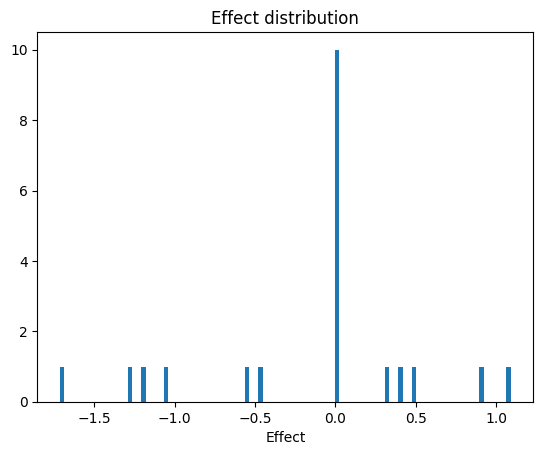

In [453]:
effect_distribution = np.log(ground_truths[0])
#plot effect distribution
plt.figure()
plt.hist(effect_distribution, bins=100)
plt.title("Effect distribution")
plt.xlabel("Effect")
plt.show()

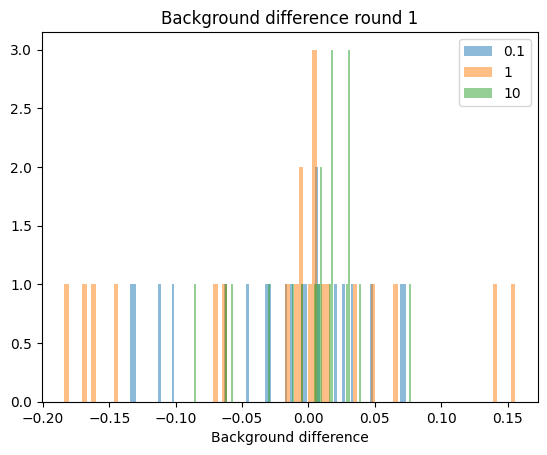

In [454]:
# for r1s plot histogram of background differences all in one plot

labels = ["0.1", "1", "10"]

plt.figure()
for i in [1,4,7]:
    plt.hist(background_difference_r1s[i], bins=100, alpha=0.5)
plt.legend(labels)
plt.title("Background difference round 1")
plt.xlabel("Background difference")
plt.show()

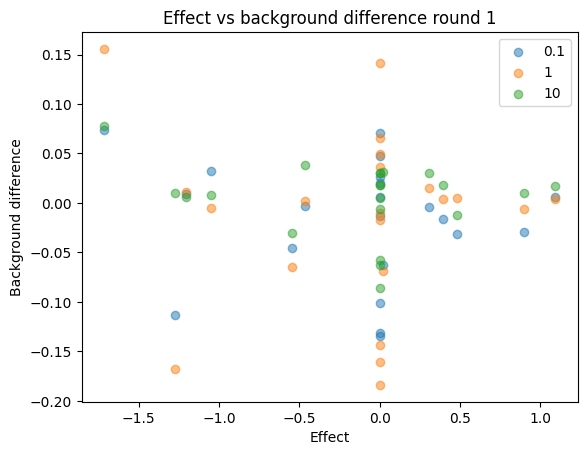

In [455]:
# plot effect vs background difference for round 1s all in one plot
labels = ["0.1", "1", "10"]
plt.figure()
for i in [1,4,7]:
    plt.scatter(effect_distribution, background_difference_r1s[i], alpha=0.5)
plt.legend(labels)
plt.title("Effect vs background difference round 1")
plt.xlabel("Effect")
plt.ylabel("Background difference")
plt.show()

In [456]:
# print independence for round 1s
print("Independence round 1")
for i in range(3):
    print(f"{labels[i]}: {independence_r1s[i]}")
    

Independence round 1
0.1: -0.14483635478038026
1: -0.14598341880368498
10: -0.14711159723074518


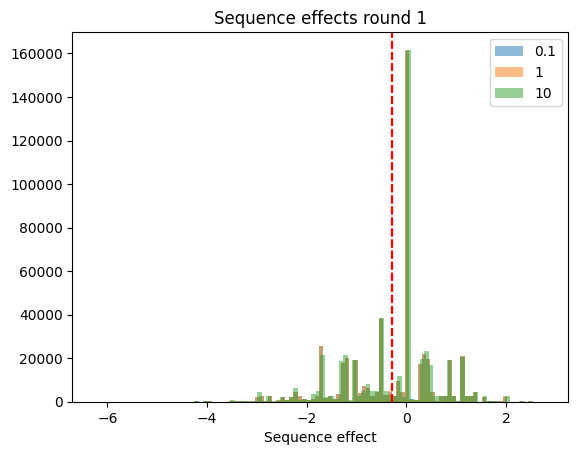

In [457]:
# for r1s plot histogram of sequence effects all in one plot, counts are stored in sequence_counts_r1s
labels = ["0.1", "1", "10"]
plt.figure()
for i in [1,4,7]:
    plt.hist(sequence_effects_r1s[i], bins=100, alpha=0.5, weights=sequence_counts_r1s[i])

plt.legend(labels)

for i in [1,4,7]:
    # add bar for mean effect
    mean_effect = np.average(sequence_effects_r1s[i], weights=sequence_counts_r1s[i])
    plt.axvline(mean_effect, color="red", linestyle="--")

plt.title("Sequence effects round 1")
plt.xlabel("Sequence effect")
plt.show()

squared error for inferred Kds
0.003
0.015
0.003
squared error for corrected Kds
0.004
0.015
0.003
difference between squared error for inferred Kds and corrected Kds
-0.0
-0.0
-0.0


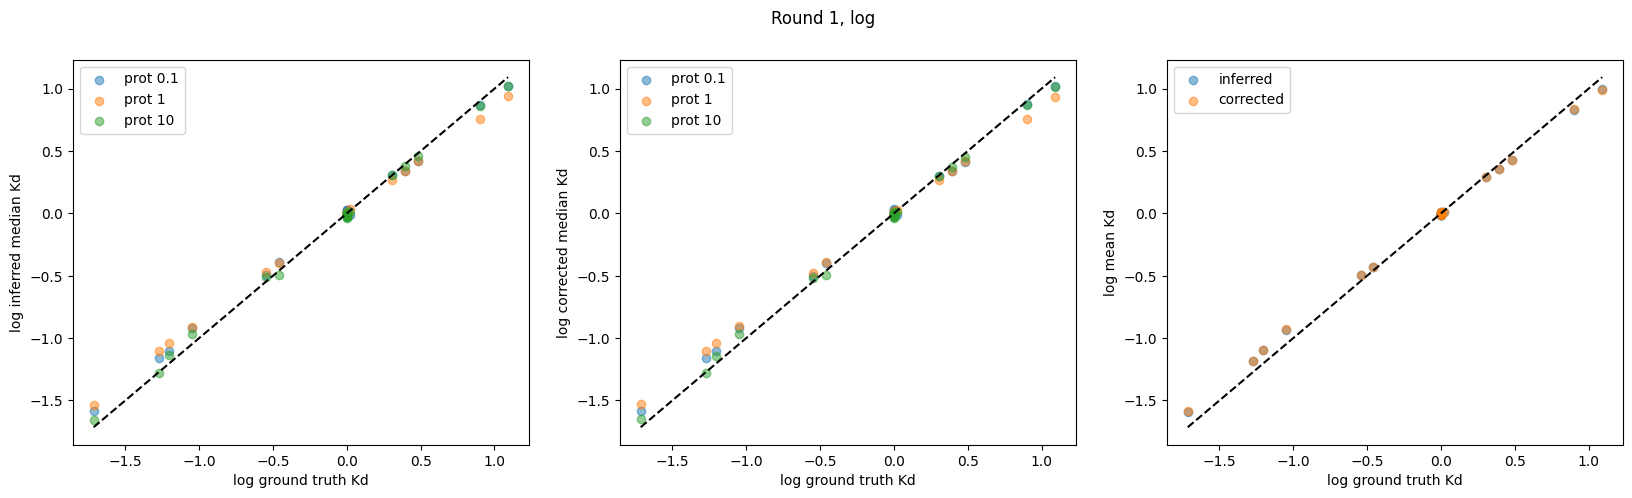

squared error for mean of inferred Kds and corrected Kds
0.006
0.006
difference between squared error for mean of inferred Kds and corrected Kds
-0.0


In [458]:
MIME_correction.comparison_plot(ground_truths[0], round_1s[1], round_1s[4], round_1s[7], corrected_round_1s[1], corrected_round_1s[4], corrected_round_1s[7], "Round 1")

In [459]:
# MIME_correction.comparison_plot(ground_truths[0],round_2s[0],round_2s[1],round_2s[2],corrected_round_2s[0],corrected_round_2s[1],corrected_round_2s[2], "First round target = 0.1")

In [460]:
# MIME_correction.comparison_plot(ground_truths[3],round_2s[3],round_2s[4],round_2s[5],corrected_round_2s[3],corrected_round_2s[4],corrected_round_2s[5], "First round target = 1")

In [461]:
# MIME_correction.comparison_plot(ground_truths[6],round_2s[6],round_2s[7],round_2s[8],corrected_round_2s[6],corrected_round_2s[7],corrected_round_2s[8], "First round target = 10")

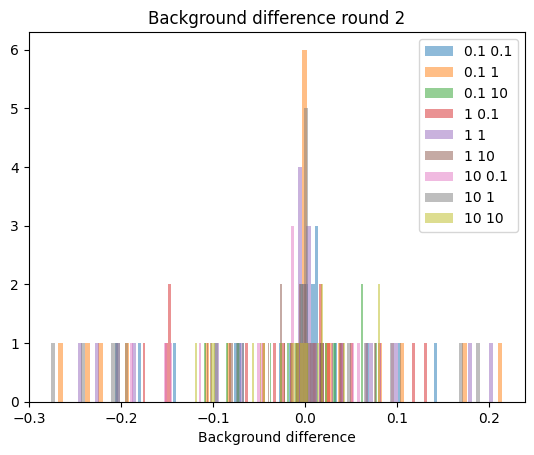

In [462]:
# for r2s plot histogram of background differences all in one plot
labels = ["0.1 0.1", "0.1 1", "0.1 10", "1 0.1", "1 1", "1 10", "10 0.1", "10 1", "10 10"]
plt.figure()
for i in background_difference_r2s:
    plt.hist(i, bins=100, alpha=0.5)
plt.legend(labels)
plt.title("Background difference round 2")
plt.xlabel("Background difference")
plt.show()

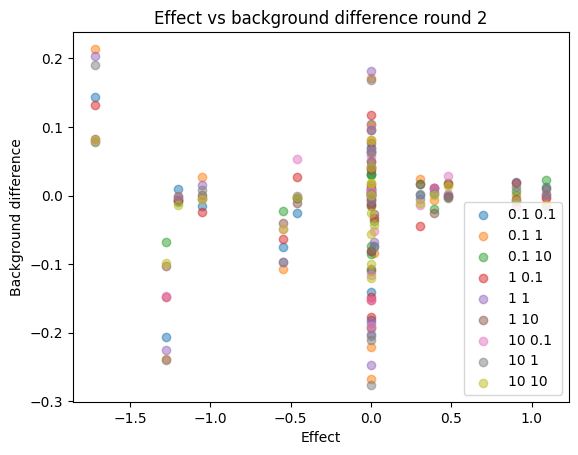

In [463]:
# plot effect vs background difference for round 2s all in one plot
plt.figure()
for i in range(9):
    plt.scatter(effect_distribution, background_difference_r2s[i], alpha=0.5)
plt.legend(labels)
plt.title("Effect vs background difference round 2")
plt.xlabel("Effect")
plt.ylabel("Background difference")
plt.show()

In [464]:
# print independence for round 2s
print("Independence round 2")
for i in range(9):
    print(f"{labels[i].split()[0]} {labels[i].split()[1]}: {independence_r2s[i]}")

Independence round 2
0.1 0.1: 0.05305749805928589
0.1 1: 0.05276555727660881
0.1 10: 0.05339841130101847
1 0.1: 0.026310734686112697
1 1: 0.02646195307716792
1 10: 0.025823046216683576
10 0.1: -0.0034399591081733932
10 1: -0.0030207349281602125
10 10: -0.003530952471907302


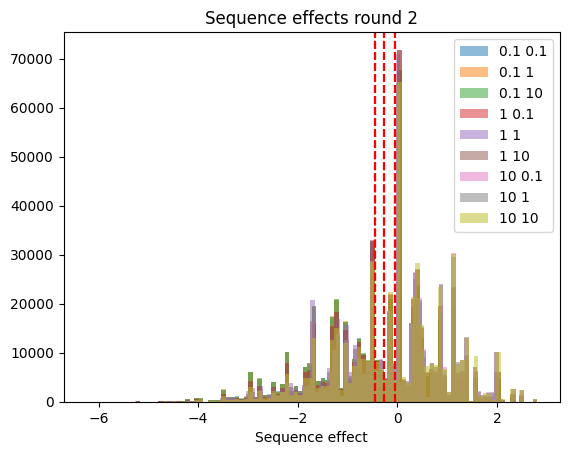

In [465]:
# for r2s plot histogram of sequence effects all in one plot, counts are stored in sequence_counts_r2s
labels = ["0.1 0.1", "0.1 1", "0.1 10", "1 0.1", "1 1", "1 10", "10 0.1", "10 1", "10 10"]
plt.figure()
for i in range(9):
    plt.hist(sequence_effects_r2s[i], bins=100, alpha=0.5, weights=sequence_counts_r2s[i])

plt.legend(labels)

#for each round 2 plot add bar for mean effect
for i in range(9):
    mean_effect = np.average(sequence_effects_r2s[i], weights=sequence_counts_r2s[i])
    plt.axvline(mean_effect, color="red", linestyle="--")

plt.title("Sequence effects round 2")
plt.xlabel("Sequence effect")
plt.show()

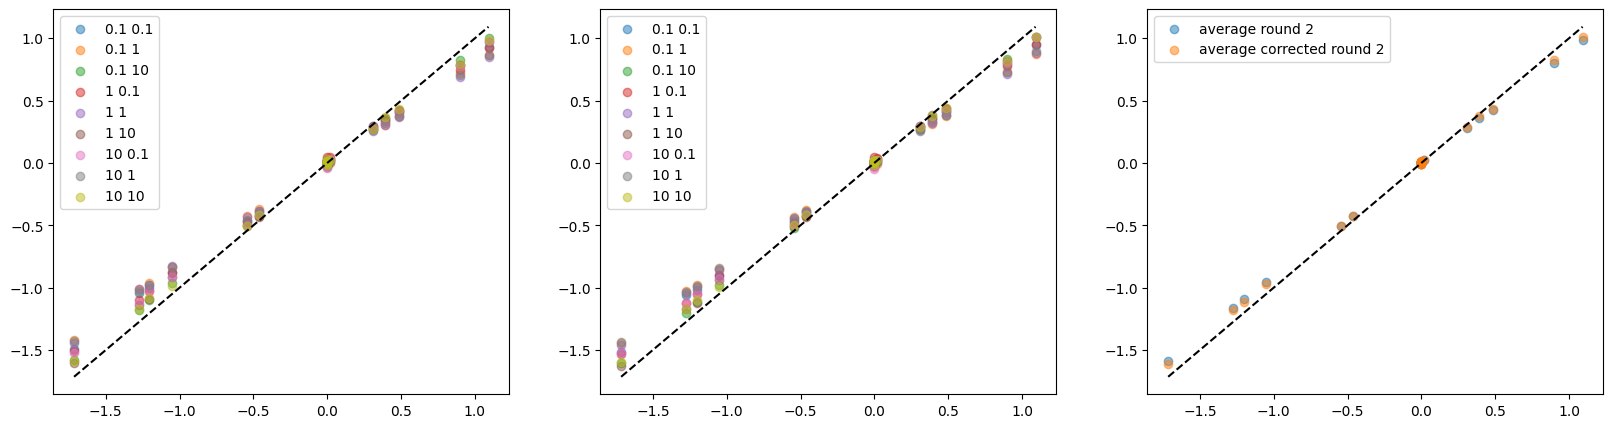

In [466]:
# plot all corrected rounds in one plot
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.scatter(np.log(ground_truths[0]), np.log(round_2s[0]), label="0.1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[1]), np.log(round_2s[1]), label="0.1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[2]), np.log(round_2s[2]), label="0.1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[3]), np.log(round_2s[3]), label="1 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[4]), np.log(round_2s[4]), label="1 1", alpha=.5)
ax1.scatter(np.log(ground_truths[5]), np.log(round_2s[5]), label="1 10", alpha=.5)
ax1.scatter(np.log(ground_truths[6]), np.log(round_2s[6]), label="10 0.1", alpha=.5)
ax1.scatter(np.log(ground_truths[7]), np.log(round_2s[7]), label="10 1", alpha=.5)
ax1.scatter(np.log(ground_truths[8]), np.log(round_2s[8]), label="10 10", alpha=.5)
ax1.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax1.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

ax2.scatter(np.log(ground_truths[0]), np.log(corrected_round_2s[0]), label="0.1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[1]), np.log(corrected_round_2s[1]), label="0.1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[2]), np.log(corrected_round_2s[2]), label="0.1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[3]), np.log(corrected_round_2s[3]), label="1 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[4]), np.log(corrected_round_2s[4]), label="1 1", alpha=.5)
ax2.scatter(np.log(ground_truths[5]), np.log(corrected_round_2s[5]), label="1 10", alpha=.5)
ax2.scatter(np.log(ground_truths[6]), np.log(corrected_round_2s[6]), label="10 0.1", alpha=.5)
ax2.scatter(np.log(ground_truths[7]), np.log(corrected_round_2s[7]), label="10 1", alpha=.5)
ax2.scatter(np.log(ground_truths[8]), np.log(corrected_round_2s[8]), label="10 10", alpha=.5)
ax2.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
y = x
ax2.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# plot the averages of corrected and uncorrected
round_2s = np.array(round_2s)
corrected_round_2s = np.array(corrected_round_2s)
ground_truths = np.array(ground_truths)

average_round_2 = np.mean(round_2s[[2,5,8]], axis=0)
average_corrected_round_2 = np.mean(corrected_round_2s[[2,5,8]], axis=0)
average_ground_truth = np.mean(ground_truths, axis=0)

ax3.scatter(np.log(average_ground_truth), np.log(average_round_2), label="average round 2", alpha=.5)
ax3.scatter(np.log(average_ground_truth), np.log(average_corrected_round_2), label="average corrected round 2", alpha=.5)
ax3.legend()
#also plot 1to1 line
x = np.linspace(np.min(np.log(average_ground_truth)), np.max(np.log(average_ground_truth)), 100)
y = x
ax3.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

plt.show()

looks like the uncorrected values are sorted from better to worse in priority 2nd round concentration low to high > first round concentration low to high
So from best to worst : .1_.1, 1_.1, 10_.1, 1_.1, 1_1, 1_10, 10_.1, 10_1, 10_10
with correction this seems to change. now the first round concentrations seems to not really matter anymore.
Can see this really well when looking at a fixed second round concentration and all 3 different first round concentrations.
The three different first round protein concentrations get corrected to be roughly on the same line.

With a fixed first round concentration the lines don't get "united" but just for high first round concentrations the lines all get shifted closer to 1to1 line retaining their difference in slope.

In [467]:
# # plot ground truth vs corrected round 2
# fig, ax = plt.subplots()
# ax.scatter(np.log(ground_truths[0]), np.log(corrected_round_2s[0]) - np.median(np.log(corrected_round_2s[0])), label="0.1 0.1", alpha=.5)
# ax.scatter(np.log(ground_truths[1]), np.log(corrected_round_2s[1]) - np.median(np.log(corrected_round_2s[1])), label="0.1 1", alpha=.5)
# ax.scatter(np.log(ground_truths[2]), np.log(corrected_round_2s[2]) - np.median(np.log(corrected_round_2s[2])), label="0.1 10", alpha=.5)
# ax.scatter(np.log(ground_truths[3]), np.log(corrected_round_2s[3]) - np.median(np.log(corrected_round_2s[3])), label="1 0.1", alpha=.5)
# ax.scatter(np.log(ground_truths[4]), np.log(corrected_round_2s[4]) - np.median(np.log(corrected_round_2s[4])), label="1 1", alpha=.5)
# ax.scatter(np.log(ground_truths[5]), np.log(corrected_round_2s[5]) - np.median(np.log(corrected_round_2s[5])), label="1 10", alpha=.5)
# ax.scatter(np.log(ground_truths[6]), np.log(corrected_round_2s[6]) - np.median(np.log(corrected_round_2s[6])), label="10 0.1", alpha=.5)
# ax.scatter(np.log(ground_truths[7]), np.log(corrected_round_2s[7]) - np.median(np.log(corrected_round_2s[7])), label="10 1", alpha=.5)
# ax.scatter(np.log(ground_truths[8]), np.log(corrected_round_2s[8]) - np.median(np.log(corrected_round_2s[8])), label="10 10", alpha=.5)
# ax.legend()
# #also plot 1to1 line
# x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
# y = x
# ax.plot(x,y, label="1 to 1 line", linestyle="--", color="black")
# plt.show()

In [468]:
# # plot all corrected rounds in one plot
# fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

# ax1.scatter(np.log(ground_truths[0]), np.log(round_1s[0]), label="0.1", alpha=.5)
# # ax1.scatter(np.log(ground_truths[1]), np.log(round_1s[1]), label="0.1 1", alpha=.5)
# # ax1.scatter(np.log(ground_truths[2]), np.log(round_1s[2]), label="0.1 10", alpha=.5)
# ax1.scatter(np.log(ground_truths[3]), np.log(round_1s[3]), label="1", alpha=.5)
# # ax1.scatter(np.log(ground_truths[4]), np.log(round_1s[4]), label="1 1", alpha=.5)
# # ax1.scatter(np.log(ground_truths[5]), np.log(round_1s[5]), label="1 10", alpha=.5)
# ax1.scatter(np.log(ground_truths[6]), np.log(round_1s[6]), label="10", alpha=.5)
# # ax1.scatter(np.log(ground_truths[7]), np.log(round_1s[7]), label="10 1", alpha=.5)
# # ax1.scatter(np.log(ground_truths[8]), np.log(round_1s[8]), label="10 10", alpha=.5)
# ax1.legend()
# #also plot 1to1 line
# x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
# y = x
# ax1.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# # ax2.scatter(np.log(ground_truths[0]), np.log(corrected_round_1s[0]), label="0.1", alpha=.5)
# ax2.scatter(np.log(ground_truths[1]), np.log(corrected_round_1s[1]), label="0.1 1", alpha=.5)
# # ax2.scatter(np.log(ground_truths[2]), np.log(corrected_round_1s[2]), label="0.1 10", alpha=.5)
# # ax2.scatter(np.log(ground_truths[3]), np.log(corrected_round_1s[3]), label="1", alpha=.5)
# ax2.scatter(np.log(ground_truths[4]), np.log(corrected_round_1s[4]), label="1 1", alpha=.5)
# # ax2.scatter(np.log(ground_truths[5]), np.log(corrected_round_1s[5]), label="1 10", alpha=.5)
# # ax2.scatter(np.log(ground_truths[6]), np.log(corrected_round_1s[6]), label="10", alpha=.5)
# ax2.scatter(np.log(ground_truths[7]), np.log(corrected_round_1s[7]), label="10 1", alpha=.5)
# # ax2.scatter(np.log(ground_truths[8]), np.log(corrected_round_1s[8]), label="10 10", alpha=.5)
# ax2.legend()
# #also plot 1to1 line
# x = np.linspace(np.min(np.log(ground_truths[0])), np.max(np.log(ground_truths[0])), 100)
# y = x
# ax2.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# # plot the averages of corrected and uncorrected
# round_1s = np.array(round_1s)
# corrected_round_1s = np.array(corrected_round_1s)
# ground_truths = np.array(ground_truths)

# average_round_1 = np.mean(round_1s, axis=0)
# average_corrected_round_1 = np.mean(corrected_round_1s, axis=0)
# average_ground_truth = np.mean(ground_truths, axis=0)

# ax3.scatter(np.log(average_ground_truth), np.log(average_round_1), label="average round 2", alpha=.5)
# ax3.scatter(np.log(average_ground_truth), np.log(average_corrected_round_1), label="average corrected round 2", alpha=.5)
# ax3.legend()
# #also plot 1to1 line
# x = np.linspace(np.min(np.log(average_ground_truth)), np.max(np.log(average_ground_truth)), 100)
# y = x
# ax3.plot(x,y, label="1 to 1 line", linestyle="--", color="black")

# plt.show()